In [3]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib widget
# from ipywidgets import interact
import sympy as smp

In [4]:
# photonic crystal parameters
eps1 = 2.33  # SiO2
eps2 = 17.88  # InSb
d = 2  # layer width

# Normal incidence

In [5]:
# useful intermediate functions
k1 = lambda w: np.sqrt(w**2 * eps1)
k2 = lambda w: np.sqrt(w**2 * eps2)
c1 = lambda w: np.cos(k1(w)*d)
s1 = lambda w: np.sin(k1(w)*d)
c2 = lambda w: np.cos(k2(w)*d)
s2 = lambda w: np.sin(k2(w)*d)

# frequencies 
ws = np.linspace(0.001, 3/d, 8000)  # represents omega / c (or, equivalently, we set c = 1)

# Bloch's k vector as a function of w
kB = 0.5 / d * np.arccos(c1(ws)*c2(ws) - 0.5*(np.sqrt(eps2/eps1) + np.sqrt(eps1/eps2))*s1(ws)*s2(ws))

/tmp/ipykernel_37164/711411784.py:13: RuntimeWarning: invalid value encountered in arccos
  kB = 0.5 / d * np.arccos(c1(ws)*c2(ws) - 0.5*(np.sqrt(eps2/eps1) + np.sqrt(eps1/eps2))*s1(ws)*s2(ws))


(0.0, 1.5606444402433814)

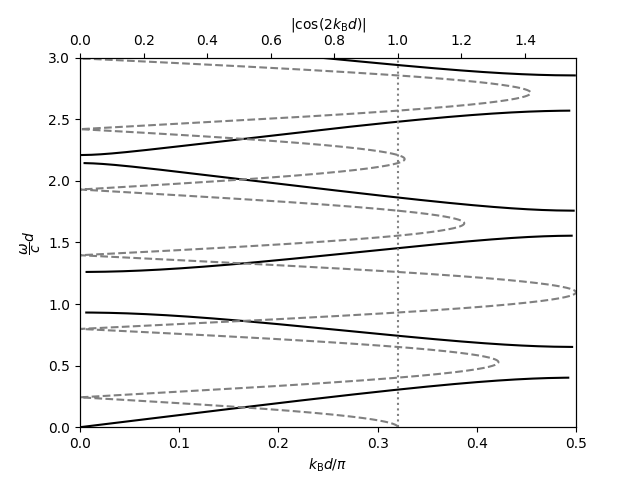

In [6]:
# dispersion relation at normal incidence 

fig, ax1 = plt.subplots(1, 1)
ax2 = plt.twiny(ax1)

# dispersion relation
ax1.plot(kB * d / np.pi, ws*d, c="k")

# band-gaps (|cos(2k_B*d| > 1, i.e., there is no solution for k_B)
ax2.plot(np.abs(c1(ws)*c2(ws) - 0.5*(np.sqrt(eps2/eps1) + np.sqrt(eps1/eps2))*s1(ws)*s2(ws)), ws*d, 
         c="gray",ls="--")
ax2.axvline(x=1, c="gray", ls=":")

ax1.set_xlabel(r"$k_\text{B} d / \pi$")
ax1.set_ylabel(r"$\dfrac{\omega}{c}d$")
ax1.set_xlim(0, 0.5)
ax1.set_ylim(0, np.max(ws*d))

ax2.set_xlabel(r"$|\cos(2 k_\text{B} d)|$")
ax2.set_xlim(0, np.max(np.abs(c1(ws)*c2(ws) - 0.5*(np.sqrt(eps2/eps1) + np.sqrt(eps1/eps2))*s1(ws)*s2(ws))))

# Incidence at an angle

Text(0, 0.5, '$\\dfrac{\\omega}{c} d$')

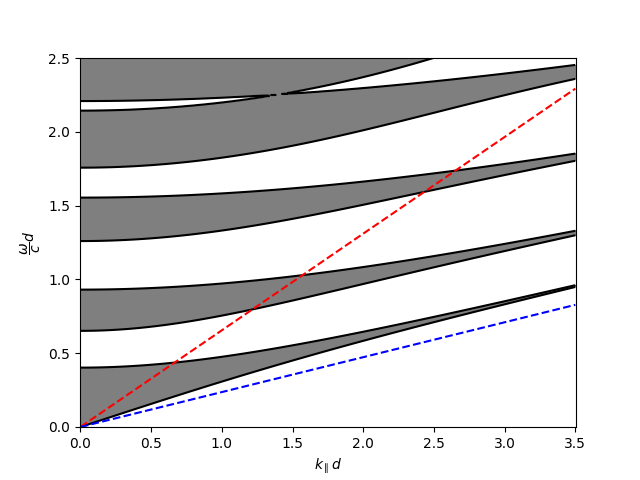

In [7]:
# frequencies
ws = np.linspace(0.001, 2.5/d, 351).reshape(-1, 1)

# parallel k-vectors (determines the incidence angle)
kps = np.linspace(0.001, 3.5/d, 351)

k1 = np.sqrt(ws**2 * eps1 - kps**2 + 0j)
k2 = np.sqrt(ws**2 * eps2 - kps**2 + 0j)

F = np.cos(k1*d) * np.cos(k2*d) - 0.5 * (k1/k2 + k2/k1) * np.sin(k1*d) * np.sin(k2*d)

# +1 whenever there is a solution (-1<F<1), -1 whenever there is no solution
F_sign = np.abs(F-1)/(F-1) * np.abs(F+1)/(F+1)

fig = plt.subplots(1, 1)
plt.pcolormesh(kps*d, ws[:, 0]*d, -F_sign.real, cmap="Grays", alpha=0.5)
plt.contour(kps*d, ws[:, 0]*d, F.real, [-1, 1], colors="k", linestyles="-")

# light-lines in the media
plt.plot(kps*d, 1/np.sqrt(eps1)*kps*d, c="red", ls="--")
plt.plot(kps*d, 1/np.sqrt(eps2)*kps*d, c="blue", ls="--")

plt.xlabel(r"$k_\parallel d$")
plt.ylabel(r"$\dfrac{\omega}{c} d$")

TypeError: Length of x (251) must match number of columns in z (351)

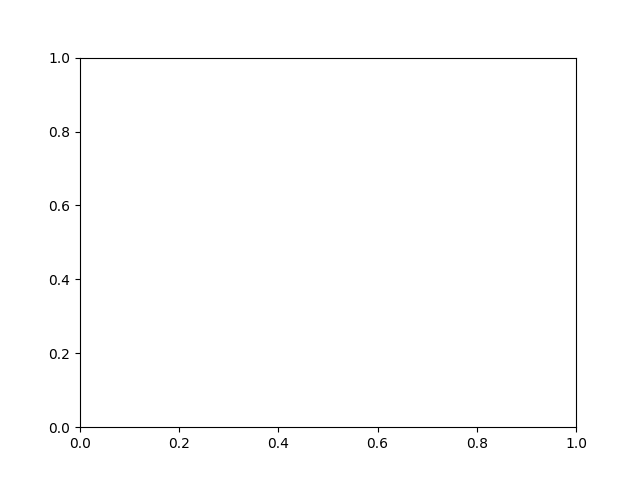

In [82]:
ws = np.linspace(0.001, 2/d, 251)
kps = np.linspace(0.001, 3.5/d, 251)

Fnum = smp.lambdify([w, kp], F)
Fval = Fnum(ws.reshape(-1, 1), kps)

fig = plt.subplots(1, 1)
# plt.pcolormesh(kps*d, ws*d, Fval)
plt.contour(kps*d, ws*d, Fval, [1])
plt.plot(kps*d, 1/np.sqrt(2.33)*kps*d)
plt.plot(kps*d, 1/np.sqrt(17.88)*kps*d)